# Linear Classifiers in Python

## Chapter 2

### Linear classifiers: the coefficients

### How models make predictions

Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

**Both logistic regression and Linear SVMs**

### Changing the model coefficients

In this exercise, you will observe the effects of changing the coefficients of a linear classifer. A 2D dataset is already loaded into the environment as X and y, along with a linear classifier object model.

In [ ]:
# Set the coefficients
model.coef_ = np.array([[-2,5]])
model.intercept_ = np.array([-9])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

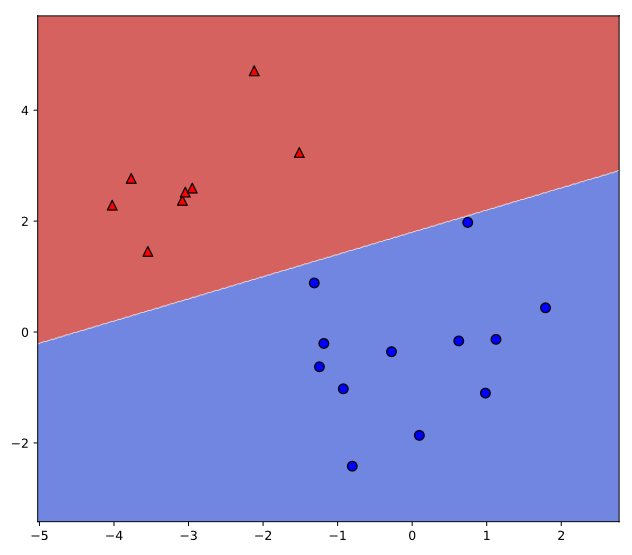

In [3]:
from IPython.display import Image
Image("linear-classifiers-in-python_2.PNG")

**The coefficients determine the slope of the boundary and the intercept shifts it.**

### Minimizing a loss function

In this exercise you'll implement linear regression "from scratch" using scipy.optimize.minimize. We'll train a model on the Boston housing price data set, which is already loaded into the variables X and y. For simplicity, we won't include an intercept in our regression model.

In [ ]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        # The loss is the square of the difference between the true and predicted y-values 
        #  (because we want them to be similar).
        s = s + (y_i_true-y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr)

# <script.py> output:
#    [-9.16299112e-02  4.86754828e-02 -3.77698794e-03  2.85635998e+00
#     -2.88057050e+00  5.92521269e+00 -7.22470732e-03 -9.67992974e-01
#      1.70448714e-01 -9.38971600e-03 -3.92421893e-01  1.49830571e-02
#     -4.16973012e-01]
#    LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### Comparing the logistic and hinge losses

In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you. The loss function diagram from the video is shown on the right.

In [ ]:
# Mathematical functions for logistic and hinge losses
# Feel free to ignore if you're not interested
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

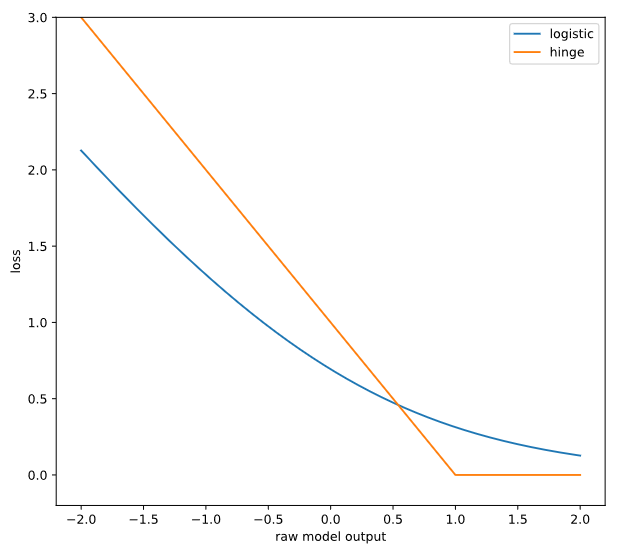

In [4]:
from IPython.display import Image
Image("linear-classifiers-in-python_4.PNG")

### Implementing logistic regression

This is very similar to the earlier exercise where you implemented linear regression "from scratch" using scipy.optimize.minimize. However, this time we'll minimize the logistic loss and compare with scikit-learn's LogisticRegression (we've set C to a large value to disable regularization; more on this in Chapter 3!). The log_loss function from the previous exercise is already defined in your environment, and the sklearn breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables X and y.